In [119]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Latex
from sympy import * 
from iminuit import Minuit
import seaborn as sns
import pandas as pd
import scipy as sp
import sys                                             # Modules to see files and folders in directories
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure
from scipy.stats import binom, poisson, norm
from simple_pendulum_functions import Residual_time
from Universal_functions import weighted_mean,uncertainty_weighted

In [120]:

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [121]:
Tan=np.loadtxt("../data/pendulum/timer_output1_tan.dat")
Michael1=np.loadtxt("../data/pendulum/trash_data_Michael.dat")
Michael2=np.loadtxt("../data/pendulum/better_data_Michael.dat")
Chris=np.loadtxt("../data/pendulum/chris_data_0.dat")
Luca=np.loadtxt("../data/pendulum/timer_output_luca.dat")

In [122]:
def fit_function_Lin(x, slope, intercept):
    return intercept + slope*x

In [123]:
print(len(Tan),len(Michael1),len(Michael2),len(Chris),len(Luca))

51 50 52 50 50


In [124]:
Time_lib={"Tan":Tan[5:,1],"Michael1":Michael1[4:,1]-min(Michael1[4:,1]),"Michael2":Michael2[5:51,1],"Chris":Chris[4:,1],"Luca":Luca[4:,1]}
Number_lib={"Tan":Tan[5:,0],"Michael1":Michael1[4:,0],"Michael2":Michael2[5:51,0],"Chris":Chris[4:,0],"Luca":Luca[4:,0]}
Time=pd.DataFrame(Time_lib)
Number=pd.DataFrame(Number_lib)
print(len(Number_lib))

5


In [125]:
Residual_time1={"Tan":Residual_time(Time.Tan,Number.Tan),"Michael1":Residual_time(Time.Michael1,Number.Michael1),"Michael2":Residual_time(Time.Michael2,Number.Michael2),"Chris":Residual_time(Time.Chris,Number.Chris),"Luca":Residual_time(Time.Luca,Number.Luca)}
Residual_Time_data=pd.DataFrame(Residual_time1)

In [126]:
chi2_object_Tan = Chi2Regression(fit_function_Lin, Number.Tan,Time.Tan, Time.Tan.std()) 
chi2_object_Michael1  = Chi2Regression(fit_function_Lin, Number.Michael1,Time.Michael1, Time.Michael1.std()) 
chi2_object_Michael2  = Chi2Regression(fit_function_Lin, Number.Michael2,Time.Michael2, Time.Michael2.std())
chi2_object_Luca  = Chi2Regression(fit_function_Lin, Number.Luca,Time.Luca, Time.Luca.std()) 
chi2_object_Chris  = Chi2Regression(fit_function_Lin, Number.Chris,Time.Chris, Time.Chris.std()) 
minuitLin_Tan = Minuit(chi2_object_Tan, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Michael1 = Minuit(chi2_object_Michael1, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Michael2 = Minuit(chi2_object_Michael2, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Luca = Minuit(chi2_object_Luca, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Chris = Minuit(chi2_object_Chris, pedantic=False, intercept=1, slope=1, print_level=0) 
minuitLin_Tan.migrad();
minuitLin_Michael1.migrad(); 
minuitLin_Michael2.migrad(); 
minuitLin_Luca.migrad(); 
minuitLin_Chris.migrad(); 

In [127]:
Rsidual_time_combined=np.block([Residual_Time_data.Tan,Residual_Time_data.Luca,Residual_Time_data.Chris])

In [128]:
weighted_mean_Time=[]
std_mean_time=[]
for i in range(len(Time.Tan)):
    weighted_mean_Time.append(np.mean(np.array([Time.Tan[i],Time.Luca[i],Time.Chris[i]])))
    std_mean_time.append(np.mean(np.abs(np.array([Residual_Time_data.Tan[i],Residual_Time_data.Luca[i],Residual_Time_data.Chris[i]]))))

In [156]:
x_pend=np.linspace(4,50,46)

In [157]:
Residual_times=[]
Residual_times_std=[]
for i in range(len(Residual_Time_data.Tan)):
    Residual_times.append(weighted_mean(np.array([Residual_Time_data.Tan[i],Residual_Time_data.Luca[i],Residual_Time_data.Chris[i]]),np.array([Residual_Time_data.Tan.mean(),Residual_Time_data.Luca.mean(),Residual_Time_data.Chris.mean()])))
    Residual_times_std.append(uncertainty_weighted([Residual_Time_data.Tan.mean(),Residual_Time_data.Luca.mean(),Residual_Time_data.Chris.mean()]))

In [158]:
Residual_times=[]
Residual_times_std=[]
for i in range(len(Residual_Time_data.Tan)):
    Residual_times.append(np.mean(np.array([Residual_Time_data.Tan[i],Residual_Time_data.Luca[i],Residual_Time_data.Chris[i]])))
    Residual_times_std.append(uncertainty_weighted([Residual_Time_data.Tan.mean(),Residual_Time_data.Luca.mean(),Residual_Time_data.Chris.mean()]))

In [181]:
RMS=np.sqrt(sum(Rsidual_time_combined**2)/(len(Rsidual_time_combined)-1))

In [182]:
chi2= Chi2Regression(fit_function_Lin, x_pend,weighted_mean_Time,RMS)
minuit = Minuit(chi2, pedantic=False, slope=1,intercept=0) #   
minuit.migrad();       # Perform the actual fit
NpointsLin = 44 - 2 # 3 parameters in fit
Chi2Lin=minuit.fval 
Prob_gau = sp.stats.chi2.sf(Chi2Lin, NpointsLin) 

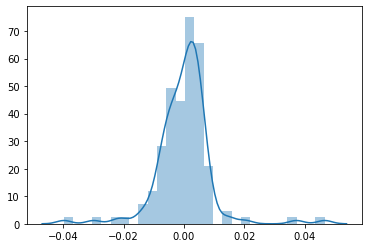

In [183]:
#fig,ax=plt.subplots(1,1,figsize=(10,10))
#sns.FacetGrid(weighted_mean_Time,ax=ax)
sns.distplot(Rsidual_time_combined)
#g.twinx()

In [184]:
x_conbined=np.linspace(-max(abs(Rsidual_time_combined)),max(abs(Rsidual_time_combined)),100)
y_Combined=sp.stats.norm(Rsidual_time_combined.mean(), Rsidual_time_combined.std())

In [185]:
minuit.errors[0]

9.823812060190946e-05

<ipython-input-186-191ae2f3aec2>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


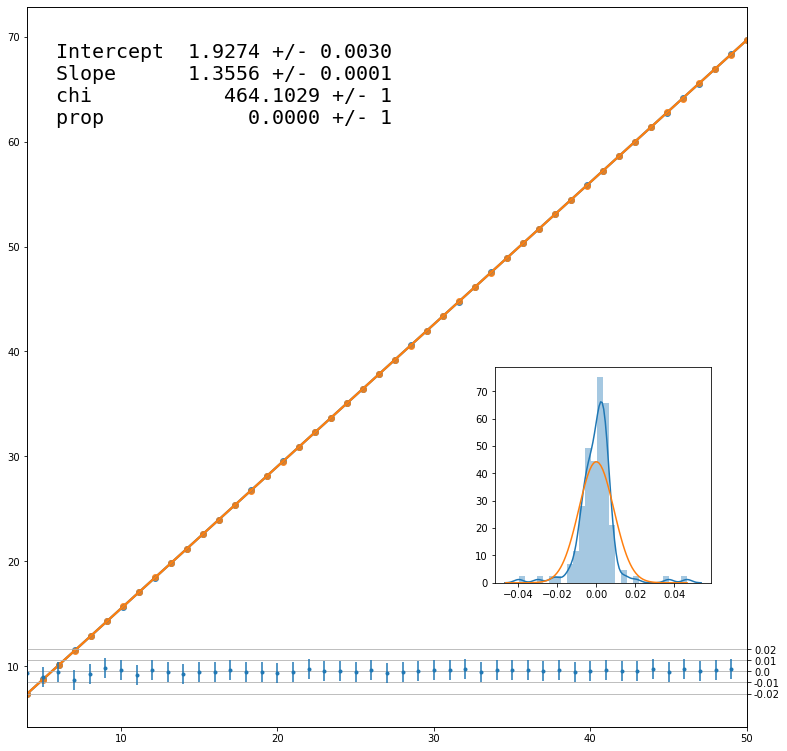

In [186]:

fig=plt.figure(figsize=(10,10))
ax=fig.add_axes([0,0,1,1])
#sns.FacetGrid(weighted_mean_Time)
ax1=fig.add_axes([0.65,0.2,0.3,0.3])
ax2 = ax.twinx()
#sns.scatterplot(x=Time.Tan,y=Residual_Time.Tan,ax=ax)
sns.regplot(x_pend,fit_function_Lin(x_pend,minuit.args[0],minuit.args[1]),ax=ax)

ax2.errorbar(Number.Tan-2,Residual_times,yerr=RMS,fmt='.')
sns.regplot(x_pend,weighted_mean_Time,ax=ax)
sns.distplot(Rsidual_time_combined,ax=ax1)
sns.lineplot(x_conbined,y_Combined.pdf(x_conbined),ax=ax1)
d = {'Intercept':[minuit.args[1], minuit.errors[1]],
     'Slope':    [minuit.args[0], minuit.errors[0]]
    ,'chi':[Chi2Lin,1],'prop':[Prob_gau,1]}
ax2.set_ymargin(0)
text = nice_string_output(d, extra_spacing=2, decimals=4)
add_text_to_ax(0.04, 0.95, text, ax, fontsize=20)
pos=(np.round(np.linspace(-0.02,0.02,5),2))
ax2.set_yticks(pos)
ax2.set_yticklabels(pos.astype(str))
ax2.set_ylim(-0.05,0.6)
#ax2.set_data_interval(self, -0.01, 0.01, ignore=False)
ax2.grid()
#ax2.set_yscale('log')
fig.tight_layout()

## weighted Length of the line Length + pendilum length

In [179]:
Data=pd.read_csv("../data/data_setup.csv")

In [166]:
length_pend=weighted_mean(np.array(Data.length_pend.dropna()),np.array(Data.lengh_pend_std.dropna()))/2*10**(-2)
line_length=weighted_mean(np.array(Data.line_length.dropna()),np.array(Data.line_length_std.dropna()))*10**(-2)
length_pend_std=uncertainty_weighted(np.array(Data.lengh_pend_std.dropna()))*10**(-2)
line_length_std=uncertainty_weighted(np.array(Data.line_length_std.dropna()))*10**(-2)
tot_length=np.array([length_pend+line_length,length_pend_std+line_length_std])

In [167]:
L,g,T= symbols("L, g, T")
dL,dg,dT= symbols("sigma_L, sigma_g, sigma_T")

In [140]:
g=L*(2*pi/T)**2
dg=sqrt((dL*g.diff(L))**2+(g.diff(T)*dT)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('sigma_dg'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [141]:
print((tot_length[0])*(2*np.pi/(slope_weigted*2))**2)
print((tot_length[0])*(2*np.pi/(minuit.args[0]*2))**2)

9.859998641513052
9.85999864150869


In [142]:
# Turn expression into numerical functions 
fg = lambdify((L,T),g)
fdg = lambdify((L,T,dL,dT),dg)
# Numerically evaluate expressions and print 
vg= fg(tot_length,slope_weigted*2)
vdg = fdg(tot_length[0],slope_weigted*2,tot_length[1],slope_std_weigted)
lprint(fr'g = ({np.round(vg,2):} \pm {np.round(vdg,1)})\,\mathrm{{m/s^2}}')


<IPython.core.display.Latex object>

In [143]:
0.15/tot_length[0]

0.0781936256962533